In [70]:

import sys
sys.path.insert(0, '..')
import os
from src.utils import image_utils as iu
%load_ext autoreload
%autoreload 2
from PIL import Image
import cv2
import matplotlib.pyplot as plt

from deepface import DeepFace
import glob
from tqdm import tqdm

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
def create_luminance_dataset(dataset_path="../data/dataset_v2/", common_folder_name="profiles", sub_folder="profile"):
    root_new = "../data/luminance/"
    if not os.path.exists(root_new):
        os.makedirs(root_new)
    profiles_path = dataset_path +common_folder_name
    for person in os.listdir(profiles_path):
        images_path = os.path.join(profiles_path, person, sub_folder)
        root_person = root_new + common_folder_name+ "/"+ person + sub_folder
        for root, dirs, files in os.walk(images_path):
            for file in files:
                if file.endswith(".jpg") or file.endswith(".png"):
                    image_path = os.path.join(root, file)
                    for factor in [0.5, 0.6, 0.75, 4/3, 3/2]:
                        scale_type = "/linear"
                        factor_applied = str(factor).replace('.', '_')
                        image = cv2.imread(image_path)
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                        new_image = iu.change_luminance(image, scale_type=iu.ScaleType.LINEAR, factor=factor)
                        factor_path = os.path.join(root_person+scale_type, factor_applied)
                        print(factor_path)
                        os.makedirs(factor_path, exist_ok=True)
                        result_image_path = os.path.join(factor_path, file)
                        plt.imsave(result_image_path, new_image)
                    for factor in [-100, -20, -10, 30]:
                        scale_type = "/constant"
                        factor_applied = str(factor).replace('.', '_')
                        image = cv2.imread(image_path)
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                        new_image = iu.change_luminance(image, scale_type=iu.ScaleType.CONSTANT, factor=factor)
                        factor_path = os.path.join(root_person + scale_type, factor_applied)
                        print(factor_path)
                        os.makedirs(factor_path, exist_ok=True)
                        result_image_path = os.path.join(factor_path, file)
                        plt.imsave(result_image_path, new_image)
                    scale_type = "/quadratic"
                    factor_applied = "quadratic"
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    new_image = iu.change_luminance(image, scale_type=iu.ScaleType.QUADRATIC)
                    factor_path = os.path.join(root_person+scale_type, factor_applied)
                    print(factor_path)
                    os.makedirs(factor_path, exist_ok=True)
                    result_image_path = os.path.join(factor_path, file)
                    plt.imsave(result_image_path, new_image)
                    


In [119]:
create_luminance_dataset()

../data/luminance/profiles/Teri_Hatcherprofile/linear/0_5
../data/luminance/profiles/Teri_Hatcherprofile/linear/0_6
../data/luminance/profiles/Teri_Hatcherprofile/linear/0_75
../data/luminance/profiles/Teri_Hatcherprofile/linear/1_3333333333333333
../data/luminance/profiles/Teri_Hatcherprofile/linear/1_5
../data/luminance/profiles/Teri_Hatcherprofile/constant/-100
../data/luminance/profiles/Teri_Hatcherprofile/constant/-20
../data/luminance/profiles/Teri_Hatcherprofile/constant/-10
../data/luminance/profiles/Teri_Hatcherprofile/constant/30
../data/luminance/profiles/Teri_Hatcherprofile/quadratic/quadratic
../data/luminance/profiles/Teri_Hatcherprofile/linear/0_5
../data/luminance/profiles/Teri_Hatcherprofile/linear/0_6
../data/luminance/profiles/Teri_Hatcherprofile/linear/0_75
../data/luminance/profiles/Teri_Hatcherprofile/linear/1_3333333333333333
../data/luminance/profiles/Teri_Hatcherprofile/linear/1_5
../data/luminance/profiles/Teri_Hatcherprofile/constant/-100
../data/luminance/pr

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


../data/luminance/profiles/Leonardo_DiCaprioprofile/linear/1_3333333333333333
../data/luminance/profiles/Leonardo_DiCaprioprofile/linear/1_5
../data/luminance/profiles/Leonardo_DiCaprioprofile/constant/-100
../data/luminance/profiles/Leonardo_DiCaprioprofile/constant/-20
../data/luminance/profiles/Leonardo_DiCaprioprofile/constant/-10
../data/luminance/profiles/Leonardo_DiCaprioprofile/constant/30


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


../data/luminance/profiles/Leonardo_DiCaprioprofile/quadratic/quadratic
../data/luminance/profiles/Leonardo_DiCaprioprofile/linear/0_5
../data/luminance/profiles/Leonardo_DiCaprioprofile/linear/0_6
../data/luminance/profiles/Leonardo_DiCaprioprofile/linear/0_75
../data/luminance/profiles/Leonardo_DiCaprioprofile/linear/1_3333333333333333
../data/luminance/profiles/Leonardo_DiCaprioprofile/linear/1_5
../data/luminance/profiles/Leonardo_DiCaprioprofile/constant/-100
../data/luminance/profiles/Leonardo_DiCaprioprofile/constant/-20
../data/luminance/profiles/Leonardo_DiCaprioprofile/constant/-10
../data/luminance/profiles/Leonardo_DiCaprioprofile/constant/30
../data/luminance/profiles/Leonardo_DiCaprioprofile/quadratic/quadratic
../data/luminance/profiles/Leonardo_DiCaprioprofile/linear/0_5
../data/luminance/profiles/Leonardo_DiCaprioprofile/linear/0_6
../data/luminance/profiles/Leonardo_DiCaprioprofile/linear/0_75
../data/luminance/profiles/Leonardo_DiCaprioprofile/linear/1_33333333333333

In [67]:
def categorize_psnr(psnr):
    """
    Function to categorize PSNR into specific ranges.
    """
    if psnr >= 50 and psnr <= 80:
        return "psnr_50_80"
    elif psnr >= 40 and psnr < 50:
        return "psnr_40_50"
    elif psnr >= 30 and psnr < 40:
        return "psnr_30_40"
    elif psnr >= 20 and psnr < 30:
        return "psnr_20_30"
    elif psnr >= 10 and psnr < 20:
        return "psnr_10_20"
    else:
        return "wrong_range"

In [68]:
def create_noise_dataset(dataset_path="../data/dataset_v2/", common_folder_name="profiles", sub_folder="profile"):
    root_new = "../data/psnr/"
    if not os.path.exists(root_new):
        os.makedirs(root_new)
    profiles_path = dataset_path +common_folder_name
    for person in os.listdir(profiles_path):
        images_path = os.path.join(profiles_path, person, sub_folder)
        root_person = root_new + common_folder_name+ "/"+ person + sub_folder
        for root, dirs, files in os.walk(images_path):
            for file in files:
                if file.endswith(".jpg") or file.endswith(".png"):
                    image_path = os.path.join(root, file)
                    image = cv2.imread(image_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    for std in [0.2, 0.35, 0.5, 0.25, 5, 10, 30, 100]:  # Adjusted standard deviations
                        noisy_image = iu.add_gaussian_noise(image=image, std=std)
                        psnr = iu.calculate_psnr(image, noisy_image)
                        psnr_category = categorize_psnr(psnr)
                        if psnr_category == "wrong_range":
                            continue
                        psnr_folder = os.path.join(root_new, common_folder_name, person, sub_folder, psnr_category)
                        os.makedirs(psnr_folder, exist_ok=True)
                        noisy_image_path = os.path.join(psnr_folder, file)
                        cv2.imwrite(noisy_image_path, cv2.cvtColor(noisy_image, cv2.COLOR_RGB2BGR))
                        print(f"Noisy image saved to: {noisy_image_path}, PSNR: {psnr}")
                    

In [69]:
create_noise_dataset()

Noisy image saved to: ../data/psnr/profiles/Teri_Hatcher/profile/psnr_50_80/4.jpg, PSNR: 54.88953375485594
Noisy image saved to: ../data/psnr/profiles/Teri_Hatcher/profile/psnr_40_50/4.jpg, PSNR: 44.2073230322993
Noisy image saved to: ../data/psnr/profiles/Teri_Hatcher/profile/psnr_50_80/4.jpg, PSNR: 71.74261902598667
Noisy image saved to: ../data/psnr/profiles/Teri_Hatcher/profile/psnr_30_40/4.jpg, PSNR: 30.72590403903525
Noisy image saved to: ../data/psnr/profiles/Teri_Hatcher/profile/psnr_20_30/4.jpg, PSNR: 29.232600086501726
Noisy image saved to: ../data/psnr/profiles/Teri_Hatcher/profile/psnr_20_30/4.jpg, PSNR: 28.132676719014242
Noisy image saved to: ../data/psnr/profiles/Teri_Hatcher/profile/psnr_20_30/4.jpg, PSNR: 27.920282905170673
Noisy image saved to: ../data/psnr/profiles/Teri_Hatcher/profile/psnr_50_80/2.jpg, PSNR: 54.40647849281666
Noisy image saved to: ../data/psnr/profiles/Teri_Hatcher/profile/psnr_40_50/2.jpg, PSNR: 44.10094325866254
Noisy image saved to: ../data/psnr/

libpng warning: iCCP: known incorrect sRGB profile


Noisy image saved to: ../data/psnr/profiles/Leonardo_DiCaprio/profile/psnr_50_80/4.jpg, PSNR: 55.5734819046074
Noisy image saved to: ../data/psnr/profiles/Leonardo_DiCaprio/profile/psnr_40_50/4.jpg, PSNR: 45.25911812010559
Noisy image saved to: ../data/psnr/profiles/Leonardo_DiCaprio/profile/psnr_50_80/4.jpg, PSNR: 73.78869278576789
Noisy image saved to: ../data/psnr/profiles/Leonardo_DiCaprio/profile/psnr_30_40/4.jpg, PSNR: 31.66737421203954
Noisy image saved to: ../data/psnr/profiles/Leonardo_DiCaprio/profile/psnr_30_40/4.jpg, PSNR: 30.276088059075175
Noisy image saved to: ../data/psnr/profiles/Leonardo_DiCaprio/profile/psnr_20_30/4.jpg, PSNR: 29.237045940666224
Noisy image saved to: ../data/psnr/profiles/Leonardo_DiCaprio/profile/psnr_20_30/4.jpg, PSNR: 29.00596384691077
Noisy image saved to: ../data/psnr/profiles/Leonardo_DiCaprio/profile/psnr_50_80/2.jpg, PSNR: 54.24028332848636
Noisy image saved to: ../data/psnr/profiles/Leonardo_DiCaprio/profile/psnr_40_50/2.jpg, PSNR: 43.931956

In [89]:
def authenticate_user(image_path):
    result = DeepFace.find(image_path, db_path="../data/dataset_v2/all_images", silent=True)
    return result

In [90]:
images = glob.glob("../data/psnr/**/*.jpg", recursive=True)


def get_profile_data_dict(image_path: str):
    normalized = os.path.normpath(image_path)
    path_parts = normalized.split(os.sep)

    method = path_parts[-3]

    amount = (
        path_parts[-2]
    )

    return {
        "name": path_parts[-4],
        "method": path_parts[-3],
        "amount": amount,
        "sample_number": int(path_parts[-1].replace(".jpg", "")),
        "path": image_path,
    }


profile_data_structured = list(map(get_profile_data_dict, images))
profile_data_structured[0:3]

[{'name': 'Teri_Hatcher',
  'method': 'profile',
  'amount': 'psnr_30_40',
  'sample_number': 4,
  'path': '../data/psnr/profiles/Teri_Hatcher/profile/psnr_30_40/4.jpg'},
 {'name': 'Teri_Hatcher',
  'method': 'profile',
  'amount': 'psnr_30_40',
  'sample_number': 2,
  'path': '../data/psnr/profiles/Teri_Hatcher/profile/psnr_30_40/2.jpg'},
 {'name': 'Teri_Hatcher',
  'method': 'profile',
  'amount': 'psnr_30_40',
  'sample_number': 3,
  'path': '../data/psnr/profiles/Teri_Hatcher/profile/psnr_30_40/3.jpg'}]

In [102]:
def try_authentication(profile_data_structured):
    try:
        result = authenticate_user(profile_data_structured["path"])
        distance = result[0]["distance"][0]
        person = " ".join((result[0]["identity"][0]).split("\\")[-1].split("_")[:-2])
        max_distance = 0.35
        return distance <= max_distance, distance, person
    except:
        return pd.NA, pd.NA, pd.NA


if not os.path.exists("results_psnr.csv"):
    for prof in tqdm(profile_data_structured):
        prof["authenticated"], prof["distance"], prof["detected_person"] = (
            try_authentication(prof)
        )

    df = pd.DataFrame(profile_data_structured)
    df.to_csv("results_psnr.csv", index=False)

else:
    df = pd.read_csv("results_psnr.csv")

In [103]:
df

,name,method,amount,sample_number,path,authenticated,distance,detected_person
0,Teri_Hatcher,profile,psnr_30_40,4,../data/psnr/profiles/Teri_Hatcher/profile/psn...,False,0.446448,../data/dataset v2/all images/Candice Bergen
1,Teri_Hatcher,profile,psnr_30_40,2,../data/psnr/profiles/Teri_Hatcher/profile/psn...,True,0.228523,../data/dataset v2/all images/Angie Harmon
2,Teri_Hatcher,profile,psnr_30_40,3,../data/psnr/profiles/Teri_Hatcher/profile/psn...,True,0.259959,../data/dataset v2/all images/Teri Hatcher
3,Teri_Hatcher,profile,psnr_30_40,1,../data/psnr/profiles/Teri_Hatcher/profile/psn...,False,0.371004,../data/dataset v2/all images/Teri Hatcher
4,Teri_Hatcher,profile,psnr_30_40,0,../data/psnr/profiles/Teri_Hatcher/profile/psn...,True,0.253999,../data/dataset v2/all images/Teri Hatcher
...,...,...,...,...,...,...,...,...
1551,Jackson_Rathbone,profile,psnr_40_50,4,../data/psnr/profiles/Jackson_Rathbone/profile...,True,0.031731,../data/dataset v2/all images/Jackson Rathbone
1552,Jackson_Rathbone,profile,psnr_40_50,2,../data/psnr/profiles/Jackson_Rathbone/profile...,True,0.115799,../data/dataset v2/all images/Jackson Rathbone
1553,Jackson_Rathbone,profile,psnr_40_50,3,../data/psnr/profiles/Jackson_Rathbone/profile...,True,0.112195,../data/dataset v2/all images/Jackson Rathbone
1554,Jackson_Rathbone,profile,psnr_40_50,1,../data/psnr/profiles/Jackson_Rathbone/profile...,True,0.046696,../data/dataset v2/all images/Jackson Rathbone


In [107]:
df.name = df.name.str.replace("profile", "").str.replace("_", " ")
df.detected_person = df.detected_person.str.replace("../data/dataset v2/all images/", "")
df["detected_same_person"] = df["name"] == df["detected_person"]
df.amount = df[["amount"]].fillna(0)
df

,name,method,amount,sample_number,path,authenticated,distance,detected_person,detected_same_person
0,Teri Hatcher,profile,psnr_30_40,4,../data/psnr/profiles/Teri_Hatcher/profile/psn...,False,0.446448,Candice Bergen,False
1,Teri Hatcher,profile,psnr_30_40,2,../data/psnr/profiles/Teri_Hatcher/profile/psn...,True,0.228523,Angie Harmon,False
2,Teri Hatcher,profile,psnr_30_40,3,../data/psnr/profiles/Teri_Hatcher/profile/psn...,True,0.259959,Teri Hatcher,True
3,Teri Hatcher,profile,psnr_30_40,1,../data/psnr/profiles/Teri_Hatcher/profile/psn...,False,0.371004,Teri Hatcher,True
4,Teri Hatcher,profile,psnr_30_40,0,../data/psnr/profiles/Teri_Hatcher/profile/psn...,True,0.253999,Teri Hatcher,True
...,...,...,...,...,...,...,...,...,...
1551,Jackson Rathbone,profile,psnr_40_50,4,../data/psnr/profiles/Jackson_Rathbone/profile...,True,0.031731,Jackson Rathbone,True
1552,Jackson Rathbone,profile,psnr_40_50,2,../data/psnr/profiles/Jackson_Rathbone/profile...,True,0.115799,Jackson Rathbone,True
1553,Jackson Rathbone,profile,psnr_40_50,3,../data/psnr/profiles/Jackson_Rathbone/profile...,True,0.112195,Jackson Rathbone,True
1554,Jackson Rathbone,profile,psnr_40_50,1,../data/psnr/profiles/Jackson_Rathbone/profile...,True,0.046696,Jackson Rathbone,True


In [106]:
df.iloc[0]['detected_person']

'../data/dataset v2/all images/Candice Bergen'

In [108]:
aggregated = (
    df[["method", "amount", "detected_same_person"]]
    .groupby(["method", "amount"])
    .sum()
    .join(
        df[["method", "amount", "detected_same_person"]]
        .groupby(["method", "amount"])
        .count(),
        rsuffix="_expected_value",
    )
)

aggregated["FNR"] = (
    1
    - aggregated["detected_same_person"]
    / aggregated["detected_same_person_expected_value"]
)
aggregated["TPR"] = (
    aggregated["detected_same_person"]
    / aggregated["detected_same_person_expected_value"]
)

aggregated

detected_same_person  detected_same_person_expected_value  \
method  amount                                                                  
profile psnr_20_30                   283                                  386   
        psnr_30_40                   216                                  390   
        psnr_40_50                   377                                  390   
        psnr_50_80                   381                                  390   

                         FNR       TPR  
method  amount                          
profile psnr_20_30  0.266839  0.733161  
        psnr_30_40  0.446154  0.553846  
        psnr_40_50  0.033333  0.966667  
        psnr_50_80  0.023077  0.976923

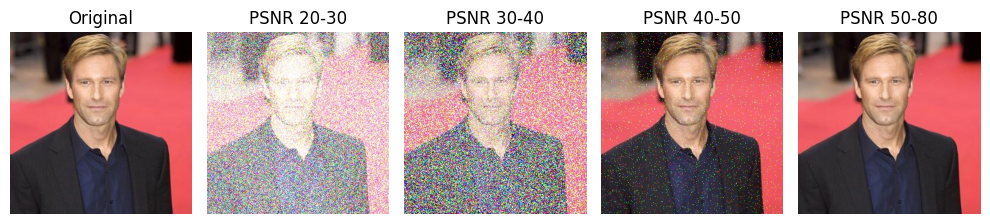

In [114]:
import matplotlib.gridspec as gridspec
original_image_path = "../data/dataset_v2/profiles/Aaron_Eckhart/profile/0.jpg"
psnr20 = "../data/psnr/profiles/Aaron_Eckhart/profile/psnr_20_30/0.jpg"
prnr_40 = "../data/psnr/profiles/Aaron_Eckhart/profile/psnr_30_40/0.jpg"
psnr_50 = "../data/psnr/profiles/Aaron_Eckhart/profile/psnr_40_50/0.jpg"
psnr_80 ="../data/psnr/profiles/Aaron_Eckhart/profile/psnr_50_80/0.jpg"
img_list = [original_image_path, psnr20, prnr_40, psnr_50, psnr_80]

def plot_images_in_one(img_list, titles):
    num_images = len(img_list)
    
    fig = plt.figure(figsize=(10, 6))
    gs = gridspec.GridSpec(1, num_images, width_ratios=[1] * num_images)
    
    for i, (img_path, title) in enumerate(zip(img_list, titles)):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        ax = plt.subplot(gs[i])
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

titles = ["Original", "PSNR 20-30", "PSNR 30-40", "PSNR 40-50", "PSNR 50-80"]

plot_images_in_one(img_list, titles)

In [117]:
latex = aggregated.to_latex(index=False)
print(latex)

\begin{tabular}{rrrr}
\toprule
detected_same_person & detected_same_person_expected_value & FNR & TPR \\
\midrule
283 & 386 & 0.266839 & 0.733161 \\
216 & 390 & 0.446154 & 0.553846 \\
377 & 390 & 0.033333 & 0.966667 \\
381 & 390 & 0.023077 & 0.976923 \\
\bottomrule
\end{tabular}



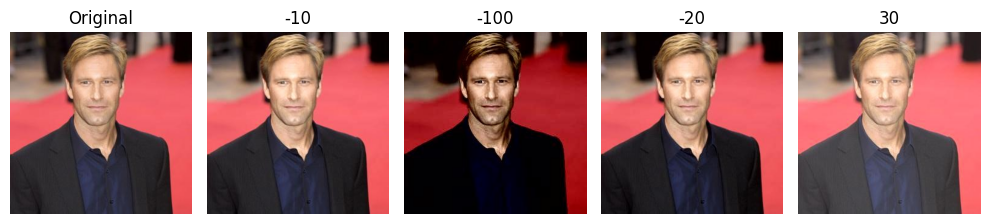

In [121]:
const1 = "../data/luminance/profiles/Aaron_Eckhartprofile/constant/-10/0.jpg"
const2 = "../data/luminance/profiles/Aaron_Eckhartprofile/constant/-100/0.jpg"
const3 = "../data/luminance/profiles/Aaron_Eckhartprofile/constant/-20/0.jpg"
const4 = "../data/luminance/profiles/Aaron_Eckhartprofile/constant/30/0.jpg"
img_list = [original_image_path, const1, const2, const3, const4]
titles = ["Original", "-10", "-100", "-20", "30"]
plot_images_in_one(img_list, titles)

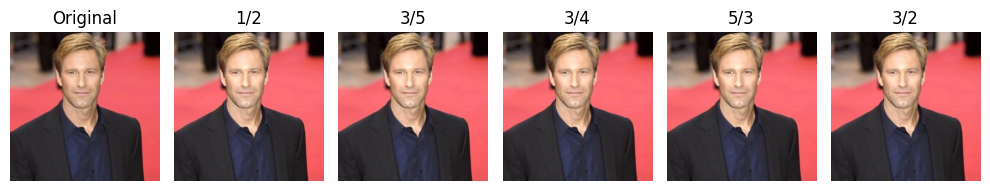

In [122]:
lin1 = "../data/luminance/profiles/Aaron_Eckhartprofile/linear/0_5/0.jpg"
lin2 = "../data/luminance/profiles/Aaron_Eckhartprofile/linear/0_6/0.jpg"
lin3 = "../data/luminance/profiles/Aaron_Eckhartprofile/linear/0_75/0.jpg"
lin4 = "../data/luminance/profiles/Aaron_Eckhartprofile/linear/1_3333333333333333/0.jpg"
lin5 = "../data/luminance/profiles/Aaron_Eckhartprofile/linear/1_5/0.jpg"
img_list = [original_image_path, lin1, lin2, lin3, lin4, lin5]
titles = ["Original", "1/2", "3/5", "3/4", "5/3", "3/2"]
plot_images_in_one(img_list, titles)

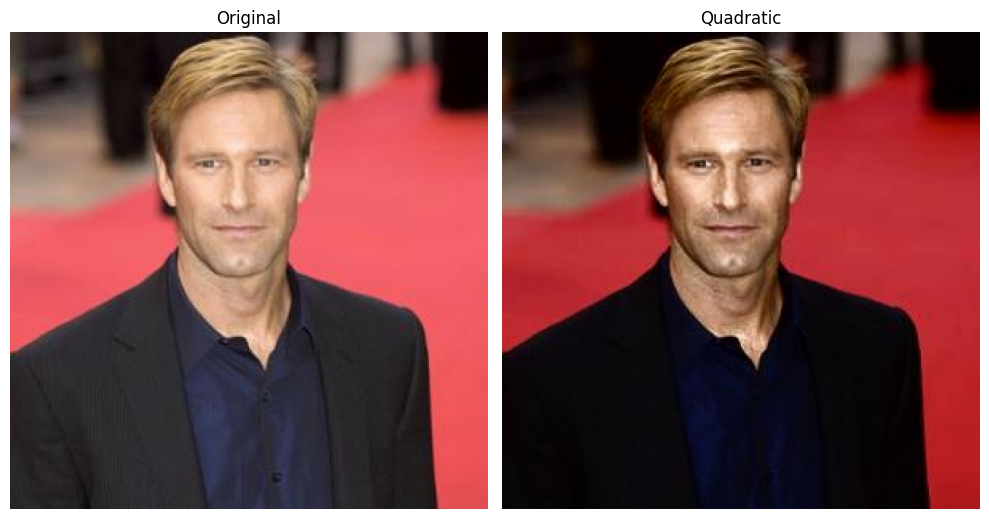

In [123]:
quad = "../data/luminance/profiles/Aaron_Eckhartprofile/quadratic/quadratic/0.jpg"
img_list = [original_image_path, quad]
titles = ["Original", "Quadratic"]
plot_images_in_one(img_list, titles)